In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('with_user_id.csv')

In [4]:
# Find data for US regio
df_us = df[(df['lat']>0) & (df['lng']<0)]

In [5]:
# Instead of operating on 932093 number of rows, lets sample them to 10%
df_us_samp = df_us.sample(frac=0.1, random_state=101)

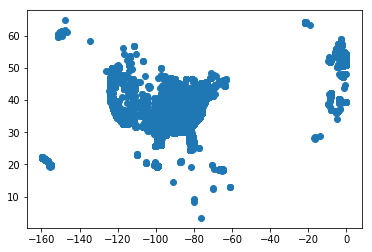

In [6]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'])

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)
kmeans.fit(df_us_samp[['lat','lng']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

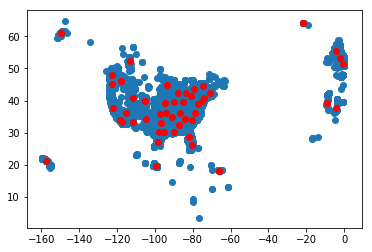

In [8]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'])
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], color='red')

In [9]:
df_us_samp['center']=kmeans.labels_

In [22]:
df_us_samp.to_csv('with_user_id_labels.csv')

In [10]:
df_us_samp.head()

,userid,lat,lng,center
958713,4466,38.952334,-77.447948,20
444404,1544,39.763549,-86.331929,34
763759,3252,42.051870,-70.185600,26
23305,112,30.255986,-97.746928,49
969760,4496,28.596401,-81.308044,22


In [11]:
X = df_us_samp[['lat','lng']]
y = df_us_samp['center']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
y_pred = knn.predict(X_test)

In [18]:
y_pred

array([ 3,  6,  5, ...,  2,  3, 32], dtype=int32)

In [19]:
knn.score(X_test, y_test)

0.9978900690197762

In [20]:
knn.predict([[41.877741,-92.645557]])

array([14], dtype=int32)

In [21]:
np.unique(df_us_samp[df_us_samp['center']==14]['userid'])

array([   0,    9,   10,   28,   49,   51,   64,   65,   71,   73,   75,
         81,   87,  107,  110,  127,  133,  135,  142,  192,  193,  194,
        195,  204,  232,  237,  248,  256,  257,  259,  263,  273,  282,
        286,  289,  296,  299,  300,  310,  317,  323,  339,  343,  346,
        351,  356,  362,  363,  368,  374,  390,  391,  392,  400,  406,
        420,  421,  423,  428,  443,  447,  448,  451,  461,  479,  480,
        482,  485,  488,  497,  500,  503,  512,  522,  534,  542,  543,
        544,  553,  558,  564,  565,  566,  569,  570,  576,  583,  591,
        603,  648, 1018, 1116, 1120, 1282, 1670, 1703, 1732, 1773, 1801,
       1861, 1883, 1962, 1999, 2236, 2348, 2395, 2408, 2467, 2468, 2521,
       2540, 2552, 2594, 2604, 2615, 2624, 2633, 2638, 2644, 2650, 2652,
       2662, 2680, 2685, 2703, 2733, 2737, 2738, 2743, 2758, 2760, 2763,
       2779, 2783, 2789, 2808, 2812, 2826, 2836, 2847, 2853, 2889, 2898,
       2934, 2937, 2960, 2963, 3008, 3014, 3075, 30